#**Limpieza de Datos BMW**

A esta limpieza de datos han contribuido: Carles Tisaire, Cristina Torrens, Ivan Lopez y Fernando Arroyo.



##SET UP

In [1]:
# 1: Conectamos la notebook a drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 2: Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder
import random


In [3]:
# 3: Leemos el dataset original:
df_bmw = pd.read_csv("/content/drive/MyDrive/Limpieza de Datos/bmw_pricing_v3.csv")

## ANALISIS PRELIMINAR

In [4]:
# 1: Analizamos la información preliminar del archivo
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [5]:
# 2: Analizamos la contenido preliminar del archivo
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [6]:
# 3: Analizamos la cantidad de nulos en el data set original
df_bmw.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

##1.-¿Qué columnas eliminaron inicialmente del dataset y por qué?

Eliminamos inicialmente:

* marca (toda la columna tiene 1 solo dato, BMW)
* alerta_lim_velocidad
* asientos_traseros_plegables (demasiados nulos)


Al analizar columna por columna vemos que disponemos de mejor información de:

* volante_regulable
* tipo_gasolina
* tipo_coche aire_acondicionado
* camara_trasera
* gps
* bluetooth
* elevalunas_electrico

Estas variables nos permite discernir entre un vehículo con mejores prestaciones que otro modelo, es decir, modelos con mayor precio.


## TRATAMIENTO PRELIMINAR

In [7]:
# 0: Función para eliminar columnas iniciales:
def dropcolumnas(dataset, columnasiniciales):
  dataset_preliminar = dataset.drop(columns=columnasiniciales)
  return dataset_preliminar

In [8]:
# 1: Eliminamos las columnas que nos crean ruido en la muestra:
dataset = df_bmw
columnasiniciales = ['marca', 'asientos_traseros_plegables']

# 1.1: Aplicamos la función:
df_bmw = dropcolumnas(dataset, columnasiniciales)

In [9]:
# 1.2: Comprobamos el resultado
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4840 non-null   object 
 1   km                    4841 non-null   float64
 2   potencia              4842 non-null   float64
 3   fecha_registro        2420 non-null   object 
 4   tipo_gasolina         4838 non-null   object 
 5   color                 4398 non-null   object 
 6   tipo_coche            3383 non-null   object 
 7   volante_regulable     4839 non-null   object 
 8   aire_acondicionado    4357 non-null   object 
 9   camara_trasera        4841 non-null   object 
 10  elevalunas_electrico  4841 non-null   object 
 11  bluetooth             4115 non-null   object 
 12  gps                   4843 non-null   bool   
 13  alerta_lim_velocidad  4115 non-null   object 
 14  precio                4837 non-null   float64
 15  fecha_venta          

##2. Manejo de nulos, explicar qué se hizo con los nulos por cada columna

Aquellos nulos menores de 10 que aparecen en algunas columnas los hemos eliminado directamente ya que no afectan significativamente al dataset, hay muestras similares con los datos completos.

## LIMPIEZA DE NULOS

In [10]:
# Eliminamos los nulos que tengan < de 6 nulos:

# 0: Vemos las columnas a modificar:
df_bmw.isnull().sum()

modelo                     3
km                         2
potencia                   1
fecha_registro          2423
tipo_gasolina              5
color                    445
tipo_coche              1460
volante_regulable          4
aire_acondicionado       486
camara_trasera             2
elevalunas_electrico       2
bluetooth                728
gps                        0
alerta_lim_velocidad     728
precio                     6
fecha_venta                1
dtype: int64

In [11]:
# 0.1: Función para eliminar nulos:
def eliminarnulos(dataset, columnasnulos):
  dataset_nonul = dataset.dropna(subset=columnasnulos)
  return dataset_nonul

In [12]:
# 1: Eliminamos los nulos de las columnas indicadas:
dataset = df_bmw
columnasnulos = ['modelo', 'km', 'potencia', 'tipo_gasolina', 'camara_trasera', 'precio', 'fecha_venta', 'elevalunas_electrico', 'volante_regulable']

# 1.1: Aplicamos la función:
df_bmw = eliminarnulos(dataset, columnasnulos)

In [13]:
# 2: Comprobamos el resultado:
df_bmw.isnull().sum()

modelo                     0
km                         0
potencia                   0
fecha_registro          2409
tipo_gasolina              0
color                    442
tipo_coche              1449
volante_regulable          0
aire_acondicionado       482
camara_trasera             0
elevalunas_electrico       0
bluetooth                725
gps                        0
alerta_lim_velocidad     725
precio                     0
fecha_venta                0
dtype: int64

##Nulos fecha_registro

In [14]:
# GEstión nulos fechas

# A continuación, vamos a gestionar la columna fecha_registro. Esta columna tiene demasiados nulos y no hay forma de rellenarlos
# Una forma de gestionarlo es haciendo la diferencia entre fecha_venta y fecha_registro:

In [15]:
# 0: Vemos las columnas a modificar:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4817 non-null   object 
 1   km                    4817 non-null   float64
 2   potencia              4817 non-null   float64
 3   fecha_registro        2408 non-null   object 
 4   tipo_gasolina         4817 non-null   object 
 5   color                 4375 non-null   object 
 6   tipo_coche            3368 non-null   object 
 7   volante_regulable     4817 non-null   object 
 8   aire_acondicionado    4335 non-null   object 
 9   camara_trasera        4817 non-null   object 
 10  elevalunas_electrico  4817 non-null   object 
 11  bluetooth             4092 non-null   object 
 12  gps                   4817 non-null   bool   
 13  alerta_lim_velocidad  4092 non-null   object 
 14  precio                4817 non-null   float64
 15  fecha_venta           4817

In [16]:
# PASO 1: Convertir 'fecha_registro' y 'fecha_venta' a datetime para facilitar el manejo
df_bmw[['fecha_registro', 'fecha_venta']] = df_bmw[['fecha_registro', 'fecha_venta']].apply(pd.to_datetime)

<ipython-input-16-5b50b65d3408>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw[['fecha_registro', 'fecha_venta']] = df_bmw[['fecha_registro', 'fecha_venta']].apply(pd.to_datetime)


In [17]:
# PASO 2: Calcular y analizar la diferencia de días
# 2.1: Calcular la diferencia de días entre 'fecha_registro' y 'fecha_venta'
df_bmw['diferencia_dias'] = (df_bmw['fecha_venta'] - df_bmw['fecha_registro']).dt.days

<ipython-input-17-7dc9c9396c02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw['diferencia_dias'] = (df_bmw['fecha_venta'] - df_bmw['fecha_registro']).dt.days


In [18]:
# 2.2: Filtrar los registros donde la diferencia de días es negativa
registros_negativos = df_bmw[df_bmw['diferencia_dias'] < 0]

In [19]:
# 2.3: Mostrar estos registros
"Registros con diferencia de días negativa:"
registros_negativos

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,diferencia_dias
100,320,342768.0,135.0,2011-12-01,diesel,black,NaN,False,True,False,True,False,True,NaN,8200.0,2010-04-01,-609.0
256,316,201102.0,85.0,2013-12-01,diesel,black,estate,True,NaN,False,False,False,True,False,8800.0,2008-06-01,-2009.0


In [20]:
# 2.4: Filtrar y conservar solo los registros donde la diferencia de días es no negativa
df_bmw = df_bmw[df_bmw['diferencia_dias'] >= 0]

In [21]:
# 2.5: Verificar el nuevo tamaño del DataFrame y mostrar los primeros registros para confirmar
"Tamaño del DataFrame después de filtrar registros negativos:", df_bmw.shape
df_bmw.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,diferencia_dias
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0,2018-01-01,2161.0
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,2018-02-01,2132.0
5,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,False,True,True,True,True,17100.0,2018-02-01,2468.0
7,118,115560.0,105.0,2009-08-01,petrol,white,convertible,True,True,False,False,True,True,False,6100.0,2018-02-01,3106.0
12,420,132025.0,135.0,2014-03-01,diesel,blue,NaN,True,NaN,False,True,True,True,NaN,21700.0,2018-03-01,1461.0


In [22]:
# 2.6: Analizar la distribución de las diferencias
"Descripción de la diferencia de días:"
df_bmw['diferencia_dias'].describe()

count     2406.000000
mean      1969.960515
std        919.554142
min        215.000000
25%       1489.000000
50%       1766.000000
75%       2130.000000
max      10258.000000
Name: diferencia_dias, dtype: float64

In [23]:
# PASO 3: Imputar valores nulos en fecha_registro
# 3.1: Calcular la mediana de la diferencia de días
mediana_diferencia = df_bmw['diferencia_dias'].median()

In [24]:
# 3.2: Imputar los valores nulos en 'fecha_registro' usando la mediana de diferencia
df_bmw.loc[df_bmw['fecha_registro'].isnull(), 'fecha_registro'] = df_bmw['fecha_venta'] - pd.to_timedelta(mediana_diferencia, unit='d')

In [25]:
# 3.3: Verificación: mostrar los registros imputados para confirmar los cambios
"Registros con 'fecha_registro' imputada:"
df_bmw[df_bmw['fecha_registro'].isnull()][['fecha_registro', 'fecha_venta']]

,fecha_registro,fecha_venta


In [26]:
# 3.4: Verificar si aún hay nulos en 'fecha_registro'
print(f"Número de nulos en 'fecha_registro' después de la imputación: {df_bmw['fecha_registro'].isnull().sum()}")

Número de nulos en 'fecha_registro' después de la imputación: 0


In [27]:
# PASO 4: Extraer el año de las fechas
# 4.1: Extraer el año de 'fecha_registro' y 'fecha_venta'
df_bmw['año_registro'] = df_bmw['fecha_registro'].dt.year
df_bmw['año_venta'] = df_bmw['fecha_venta'].dt.year

In [28]:
# 4.2: Eliminar las columnas irrelevantes pero mantener el año extraído
df_bmw.drop(['fecha_registro', 'fecha_venta'], axis=1, inplace=True)

In [29]:
# PASO 5: Convertir la diferencia de días a meses
# 5.1: Convertir 'diferencia_dias' a meses
df_bmw['diferencia_meses'] = df_bmw['diferencia_dias'] / 30.4  # Aproximadamente 30.4 días por mes (365/12)
df_bmw.drop(['diferencia_dias'], axis=1, inplace=True)

In [30]:
# 5.2: Verificar la información del DataFrame después de la limpieza
df_bmw.info()
df_bmw.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2406 entries, 0 to 4841
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                2406 non-null   object 
 1   km                    2406 non-null   float64
 2   potencia              2406 non-null   float64
 3   tipo_gasolina         2406 non-null   object 
 4   color                 2185 non-null   object 
 5   tipo_coche            1671 non-null   object 
 6   volante_regulable     2406 non-null   object 
 7   aire_acondicionado    2156 non-null   object 
 8   camara_trasera        2406 non-null   object 
 9   elevalunas_electrico  2406 non-null   object 
 10  bluetooth             2034 non-null   object 
 11  gps                   2406 non-null   bool   
 12  alerta_lim_velocidad  2026 non-null   object 
 13  precio                2406 non-null   float64
 14  año_registro          2406 non-null   int32  
 15  año_venta             2406

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta,diferencia_meses
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0,2012,2018,71.085526
2,320,183297.0,120.0,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,2012,2018,70.131579
5,335,152352.0,225.0,petrol,black,NaN,True,True,False,True,True,True,True,17100.0,2011,2018,81.184211
7,118,115560.0,105.0,petrol,white,convertible,True,True,False,False,True,True,False,6100.0,2009,2018,102.171053
12,420,132025.0,135.0,diesel,blue,NaN,True,NaN,False,True,True,True,NaN,21700.0,2014,2018,48.059211


In [31]:
# PASO 6: Ahora vamos a resetar los indices para que queden actualizados
df_bmw.reset_index(drop=True,inplace=True)

## Nulos tipo_coche

In [32]:
# Vamos a analizar las otras columnas con gran cantidad de nulos y a tomar una decisión sobre ellas.

In [33]:
# 1.1. Vamos a intentar rellenar los nulos de la columna "tipo_coche" con ayuda de la columna "modelo"
df_bmw[["tipo_coche", "modelo"]]

# OBS: En función del modelo de coche que sea podemos deducir el tipo_coche que debe ser

,tipo_coche,modelo
0,NaN,118
1,NaN,320
2,NaN,335
3,convertible,118
4,NaN,420
...,...,...
2401,van,216 Active Tourer
2402,van,218 Active Tourer
2403,NaN,218 Active Tourer
2404,van,218 Gran Tourer


In [34]:
# 1.2. Lo primero que hay que hacer es comprobar si hay solo un tipo_ coche por cada modelo
modelo_vs_tipo_coche = df_bmw.groupby('modelo')['tipo_coche'].agg(lambda x: x.dropna().unique())
modelo_vs_tipo_coche

# OBS: Vemos que no solo hay un tipo_coche por cada modelo, pueden haber varios. Algunos modelos como el X6 si que tienen un solo tipo_coche

modelo
 Active Tourer                                                [van]
114                                         [hatchback, subcompact]
116                                 [estate, hatchback, subcompact]
118               [convertible, coupe, hatchback, sedan, subcomp...
120                     [convertible, hatchback, sedan, subcompact]
                                        ...                        
X5 M50                                                        [suv]
X6                                                            [suv]
X6 M                                                          [suv]
Z4                                                    [convertible]
i3                                                      [hatchback]
Name: tipo_coche, Length: 64, dtype: object

In [35]:
# 1.3. Vamos a ver la cantidad de modelos que tienen un solo tipo_coche
# Filtrar los modelos que tienen un solo tipo_coche
modelos_un_solo_tipo = modelo_vs_tipo_coche[modelo_vs_tipo_coche.apply(len) == 1]

# Contar la cantidad de modelos con un solo tipo_coche
cantidad_modelos_un_solo_tipo = len(modelos_un_solo_tipo)
print(f"Cantidad de modelos con un solo tipo_coche: {cantidad_modelos_un_solo_tipo}")

Cantidad de modelos con un solo tipo_coche: 28


In [36]:
# 1.4: Veamos que porcentaje ocupa cada tipo_coche sobre el total antes de rellenar los nulos.
porcentaje_tipo_coche = df_bmw['tipo_coche'].value_counts(normalize=True) * 100
porcentaje_tipo_coche

tipo_coche
estate         33.034111
sedan          25.074806
suv            23.099940
hatchback      13.105925
coupe           2.274087
subcompact      1.974865
van             0.777977
convertible     0.658288
Name: proportion, dtype: float64

In [37]:
# OBS: IMPORTANTE para aquellos modelos con múltiples "tipo_coche" seleccionamos 1 sola opción de forma aleatoria. Vemos que los datos vemos que están en orden alfabético.
# 2: Función para seleccionar aleatoriamente un solo tipo de coche
def seleccionar_aleatoriamente(tipo_coche):
    if isinstance(tipo_coche, str) and tipo_coche.startswith('['):
        # Convertir la cadena a una lista
        lista_tipos = eval(tipo_coche)
        # Seleccionar aleatoriamente un elemento de la lista
        return random.choice(lista_tipos)
    return tipo_coche

# 2.1: Aplicar la función a la columna 'tipo_coche'
df_bmw['tipo_coche'] = df_bmw['tipo_coche'].apply(seleccionar_aleatoriamente)

# 2.2: Verificar los cambios
print("Valores únicos en 'tipo_coche' después de la selección aleatoria:")
print(df_bmw['tipo_coche'].unique())

Valores únicos en 'tipo_coche' después de la selección aleatoria:
[nan 'convertible' 'coupe' 'estate' 'hatchback' 'sedan' 'subcompact' 'suv'
 'van']


In [38]:
# 2.2: Vemos que los porcentajes han cambiado ligeramente.
porcentaje_tipo_coche = df_bmw['tipo_coche'].value_counts(normalize=True) * 100
porcentaje_tipo_coche

tipo_coche
estate         33.034111
sedan          25.074806
suv            23.099940
hatchback      13.105925
coupe           2.274087
subcompact      1.974865
van             0.777977
convertible     0.658288
Name: proportion, dtype: float64

In [39]:
# 2.3: Rellenamos los nulos

# Utilizamos groupby y transform para rellenar los nulos
df_bmw['tipo_coche'] = df_bmw.groupby('modelo')['tipo_coche'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# En caso de que aún queden nulos (por falta de modelos correspondientes), se pueden rellenar aleatoriamente
if df_bmw['tipo_coche'].isnull().any():
    # Crear una lista de los valores existentes en la columna "tipo_coche" que no son nulos
    valores_existentes = df_bmw['tipo_coche'].dropna().unique()

    # Definir una función para reemplazar nulos con un valor aleatorio de la lista de valores existentes
    def reemplazar_nulo(valor):
        if pd.isnull(valor):
            return np.random.choice(valores_existentes)
        return valor

    # Aplicar la función a la columna "tipo_coche"
    df_bmw['tipo_coche'] = df_bmw['tipo_coche'].apply(reemplazar_nulo)

In [40]:
# 2.4: Vemos que los porcentajes han cambiado ligeramente.
porcentaje_tipo_coche = df_bmw['tipo_coche'].value_counts(normalize=True) * 100
porcentaje_tipo_coche

tipo_coche
estate         34.206151
sedan          24.438903
suv            22.152951
hatchback      13.507897
subcompact      2.119701
coupe           1.995012
van             0.831255
convertible     0.748130
Name: proportion, dtype: float64

In [41]:
# 2.5: No hay nulos "tipo_coche"
df_bmw.isnull().sum()

modelo                    0
km                        0
potencia                  0
tipo_gasolina             0
color                   221
tipo_coche                0
volante_regulable         0
aire_acondicionado      250
camara_trasera            0
elevalunas_electrico      0
bluetooth               372
gps                       0
alerta_lim_velocidad    380
precio                    0
año_registro              0
año_venta                 0
diferencia_meses          0
dtype: int64

##Nulos aire_acondicionado

In [42]:
# Vamos a gestionar la columna aire_acondicionado:

# OBS: Se puede saber si un coche tiene o no aire acondicinado en función del modelo y el precio.
# Por ejemplo: un modelo 118 con aire acondicionado será un poco % más caro que uno sin aire acondicionado, porque es un extra.

df_bmw[["modelo", "aire_acondicionado", "precio"]]

,modelo,aire_acondicionado,precio
0,118,True,11300.0
1,320,False,10200.0
2,335,True,17100.0
3,118,True,6100.0
4,420,NaN,21700.0
...,...,...,...
2401,216 Active Tourer,True,16900.0
2402,218 Active Tourer,True,14200.0
2403,218 Active Tourer,True,17500.0
2404,218 Gran Tourer,True,17000.0


In [43]:
# 1: Vamos a ver el porcentaje que ocupa cada variable de la columna aire_acondicionado
porcentaje_aire_acondicionado = df_bmw['aire_acondicionado'].value_counts(normalize=True) * 100
porcentaje_aire_acondicionado

aire_acondicionado
True     80.751391
False    19.248609
Name: proportion, dtype: float64

In [44]:
# 2: Atribución Nulos
# 2.1: Dividimos los precios en rangos para simplificar las agrupaciones y creamos categorias de precio.
price_bins = pd.qcut(df_bmw['precio'], q=10, labels=False)
df_bmw['price_bin'] = price_bins

# 2.2: Calcular Probabilidades:
# Calculamos la proporción de vehículos con aire acondicionado para cada combinación de modelo y rango de precio.

# 2.2.1: Calculamos las probabilidades de aire acondicionado por modelo y price_bin
ac_distribution = df_bmw.groupby(['modelo', 'price_bin'])['aire_acondicionado'].value_counts(normalize=True).unstack(fill_value=0)

# 2.2.2: Crea una función para imputar los valores nulos basados en estas probabilidades.
def impute_ac(row):
    # Solo imputamos si el valor es NaN
    if pd.isna(row['aire_acondicionado']):
        try:
            # Obtenemos la distribución para la combinación de modelo y price_bin
            distribution = ac_distribution.loc[(row['modelo'], row['price_bin'])]
            # Seleccionamos un valor de 'aire_acondicionado' basado en la distribución
            ac_present = np.random.choice(distribution.index, p=distribution.values)
            return ac_present
        except KeyError:
            return np.nan  # Devolvemos NaN si no hay datos para esa combinación
    else:
        return row['aire_acondicionado']

In [45]:
# 2.3: Aplicamos la función de imputación sobre cada fila del DataFrame.
df_bmw['aire_acondicionado'] = df_bmw.apply(impute_ac, axis=1)

In [46]:
# 2.4: Después de la imputación, podemos eliminar la columna temporal 'price_bin'.
df_bmw.drop(columns=['price_bin'], inplace=True)

In [47]:
# 2.5: Vemos que los porcentajes han cambiado ligeramente. Pero no afecta a la distribución de las variables de esa columna.
porcentaje_aire_acondicionado = df_bmw['aire_acondicionado'].value_counts(normalize=True) * 100
porcentaje_aire_acondicionado

aire_acondicionado
True     80.692244
False    19.307756
Name: proportion, dtype: float64

In [48]:
# 2.7: Comprobamos que ya no hay nulos en la columna aire_acondicionado
df_bmw.isnull().sum()

# OBS: Vemos que todavía hay 6 nulos. Hay que borrarlos

modelo                    0
km                        0
potencia                  0
tipo_gasolina             0
color                   221
tipo_coche                0
volante_regulable         0
aire_acondicionado        8
camara_trasera            0
elevalunas_electrico      0
bluetooth               372
gps                       0
alerta_lim_velocidad    380
precio                    0
año_registro              0
año_venta                 0
diferencia_meses          0
dtype: int64

In [49]:
# 2.8: Borramos los 6 nulos que quedan en la columna "aire_acondicionado"
df_bmw.dropna(subset=["aire_acondicionado"], inplace=True)

In [50]:
# 2.9: Ahora vamos a resetar los indices para que queden actualizados
df_bmw.reset_index(drop=True,inplace=True)

##Nulos bluetooth

In [51]:
# Tratamiento nulos bluetooth:
# 1: Vamos a ver el porcentaje que ocupa cada variable de la columna "bluetooth"
porcentaje_bluetooth = df_bmw['bluetooth'].value_counts(normalize=True) * 100
porcentaje_bluetooth

bluetooth
False    75.28367
True     24.71633
Name: proportion, dtype: float64

In [52]:
# 2: Atribución Nulos
# 2.1: Dividimos los precios en rangos para simplificar las agrupaciones y creamos categorias de precio.
price_bins = pd.qcut(df_bmw['precio'], q=10, labels=False)
df_bmw['price_bin'] = price_bins

# 2.2: Calcular Probabilidades:
# Calculamos la proporción de vehículos de bluetooth por modelo y price_bin
bluetooth_distribution = df_bmw.groupby(['modelo', 'price_bin'])['bluetooth'].value_counts(normalize=True).unstack(fill_value=0)

# 2.3: Creamos una función para imputar los valores nulos.
def impute_bluetooth(row):
    # Imputamos solo si el valor actual es NaN
    if pd.isna(row['bluetooth']):
        try:
            # Obtenemos la distribución para la combinación de modelo y price_bin
            distribution = bluetooth_distribution.loc[(row['modelo'], row['price_bin'])]
            # Seleccionamos un valor de 'bluetooth' basado en la distribución de probabilidad
            bluetooth_present = np.random.choice(distribution.index, p=distribution.values)
            return bluetooth_present
        except KeyError:
            return np.nan  # Retornamos NaN si no hay datos para esa combinación
    else:
        return row['bluetooth']

In [53]:
# 2.4: Usamos la función sobre cada fila del DataFrame.
df_bmw['bluetooth'] = df_bmw.apply(impute_bluetooth, axis=1)

In [54]:
# 2.5: Después de la imputación, eliminamos la columna price_bin.
df_bmw.drop(columns=['price_bin'], inplace=True)

In [55]:
# 2.6: Vemos que los porcentajes han cambiado ligeramente. Pero no afecta a la distribución de las variables de esa columna.
porcentaje_bluetooth = df_bmw['bluetooth'].value_counts(normalize=True) * 100
porcentaje_bluetooth

bluetooth
False    75.230898
True     24.769102
Name: proportion, dtype: float64

In [56]:
# 2.7: Comprobamos que ya no hay nulos en la columna bluetooth
df_bmw.isnull().sum()

# OBS: Vemos que todavía hay 8 nulos. Hay que borrarlos.

modelo                    0
km                        0
potencia                  0
tipo_gasolina             0
color                   221
tipo_coche                0
volante_regulable         0
aire_acondicionado        0
camara_trasera            0
elevalunas_electrico      0
bluetooth                16
gps                       0
alerta_lim_velocidad    379
precio                    0
año_registro              0
año_venta                 0
diferencia_meses          0
dtype: int64

In [57]:
# 2.8: Borramos los 8 nulos que quedan en la columna "bluetooth"
df_bmw.dropna(subset=["bluetooth"], inplace=True)

In [58]:
# 2.9: Ahora vamos a resetar los indices para que queden actualizados
df_bmw.reset_index(drop=True,inplace=True)

##Nulos alerta_lim_velocidad

In [59]:
# Tratamiento Nulos alerta_lim_velocidad:
# 1: Vamos a ver el porcentaje que ocupa cada variable de la columna alerta_lim_velocidad
porcentaje_alerta_lim_velocidad = df_bmw['alerta_lim_velocidad'].value_counts(normalize=True) * 100
porcentaje_alerta_lim_velocidad

alerta_lim_velocidad
True     54.94012
False    45.05988
Name: proportion, dtype: float64

In [60]:
# 2: Atribución Nulos
# 2.1: Dividimos los precios en rangos para simplificar las agrupaciones y creamos categorias de precio.
price_bins = pd.qcut(df_bmw['precio'], q=10, labels=False)
df_bmw['price_bin'] = price_bins

# 2.2: Calcular Probabilidades:
# Calculamos la proporción de vehículos de alerta_lim_velocidad por modelo y price_bin
alert_distribution = df_bmw.groupby(['modelo', 'price_bin'])['alerta_lim_velocidad'].value_counts(normalize=True).unstack(fill_value=0)

# 2.3: Creamos una función para imputar los valores nulos.
import numpy as np

def impute_alert(row):
    # Imputamos solo si el valor actual es NaN
    if pd.isna(row['alerta_lim_velocidad']):
        try:
            # Obtenemos la distribución para la combinación de modelo y price_bin
            distribution = alert_distribution.loc[(row['modelo'], row['price_bin'])]
            # Seleccionamos un valor de 'alerta_lim_velocidad' basado en la distribución de probabilidad
            alert_present = np.random.choice(distribution.index, p=distribution.values)
            return alert_present
        except KeyError:
            return np.nan  # Retornamos NaN si no hay datos para esa combinación
    else:
        return row['alerta_lim_velocidad']

In [61]:
# 2.4: Usamos la función sobre cada fila del DataFrame.
df_bmw['alerta_lim_velocidad'] = df_bmw.apply(impute_alert, axis=1)

In [62]:
# 2.5: Después de la imputación, eliminamos la columna price_bin.
df_bmw.drop(columns=['price_bin'], inplace=True)

In [63]:
# 2.6:Vemos que los porcentajes han cambiado ligeramente. Pero no afecta a la distribución de las variables de esa columna.
porcentaje_alerta_lim_velocidad = df_bmw['alerta_lim_velocidad'].value_counts(normalize=True) * 100
porcentaje_alerta_lim_velocidad

alerta_lim_velocidad
True     54.637437
False    45.362563
Name: proportion, dtype: float64

In [64]:
# 2.7: Comprobamos que ya no hay nulos en la columna alerta_lim_velocidad
df_bmw.isnull().sum()

# OBS: Vemos que todavía hay 9 nulos. Hay que borrarlos.

modelo                    0
km                        0
potencia                  0
tipo_gasolina             0
color                   219
tipo_coche                0
volante_regulable         0
aire_acondicionado        0
camara_trasera            0
elevalunas_electrico      0
bluetooth                 0
gps                       0
alerta_lim_velocidad     10
precio                    0
año_registro              0
año_venta                 0
diferencia_meses          0
dtype: int64

In [65]:
# 2.8: Borramos los 9 nulos que quedan en la columna "alerta_lim_velocidad"
df_bmw.dropna(subset=["alerta_lim_velocidad"], inplace=True)

In [66]:
# 2.9: Ahora vamos a resetar los indices para que queden actualizados
df_bmw.reset_index(drop=True,inplace=True)

##Nulos color

In [67]:
# Vamos a rellenar los nulos de la columna color en función del procentaje que ocupa cada color sobre el total.

In [68]:
# Tratamiento nulos color:
# Rellenamos los nulos de la columna color en función del procentaje que ocupa cada color sobre el total

# 1: Vemos el porcentaje que ocupa cada variable de la columna color
porcentaje_color = df_bmw['color'].value_counts(normalize=True) * 100
porcentaje_color

color
black     34.928007
grey      23.920111
blue      14.491407
white     11.240130
brown      6.688342
silver     6.502555
red        0.975383
beige      0.789596
green      0.371575
orange     0.092894
Name: proportion, dtype: float64

In [69]:
# 2.1: Calcula la distribución porcentual de cada color en el dataset
color_distribution = df_bmw['color'].value_counts(normalize=True)

# 2.2: Creamos una función que elija aleatoriamente un color basándose en la distribución calculada
def impute_color(row):
    if pd.isna(row['color']):
        # Elegimos un color basado en la distribución de probabilidad
        return np.random.choice(color_distribution.index, p=color_distribution.values)
    else:
        return row['color']

In [70]:
# 2.3: Usamos apply para aplicar la función de imputación sobre cada fila del DataFrame
df_bmw['color'] = df_bmw.apply(impute_color, axis=1)

In [71]:
# 2.4: Vemos que los porcentajes han cambiado ligeramente. Pero no afecta a la distribución de las variables de esa columna.
porcentaje_color = df_bmw['color'].value_counts(normalize=True) * 100
porcentaje_color

color
black     35.286678
grey      23.440135
blue      14.249578
white     11.340641
silver     6.871838
brown      6.745363
red        0.927487
beige      0.716695
green      0.337268
orange     0.084317
Name: proportion, dtype: float64

In [72]:
# 2.5: Comprobamos que ya no hay nulos en la columna alerta_lim_velocidad
df_bmw.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
año_registro            0
año_venta               0
diferencia_meses        0
dtype: int64

In [73]:
### ELIMINAR PRICE BINS

# Análisis univariable:
# HISTOGRAMAS



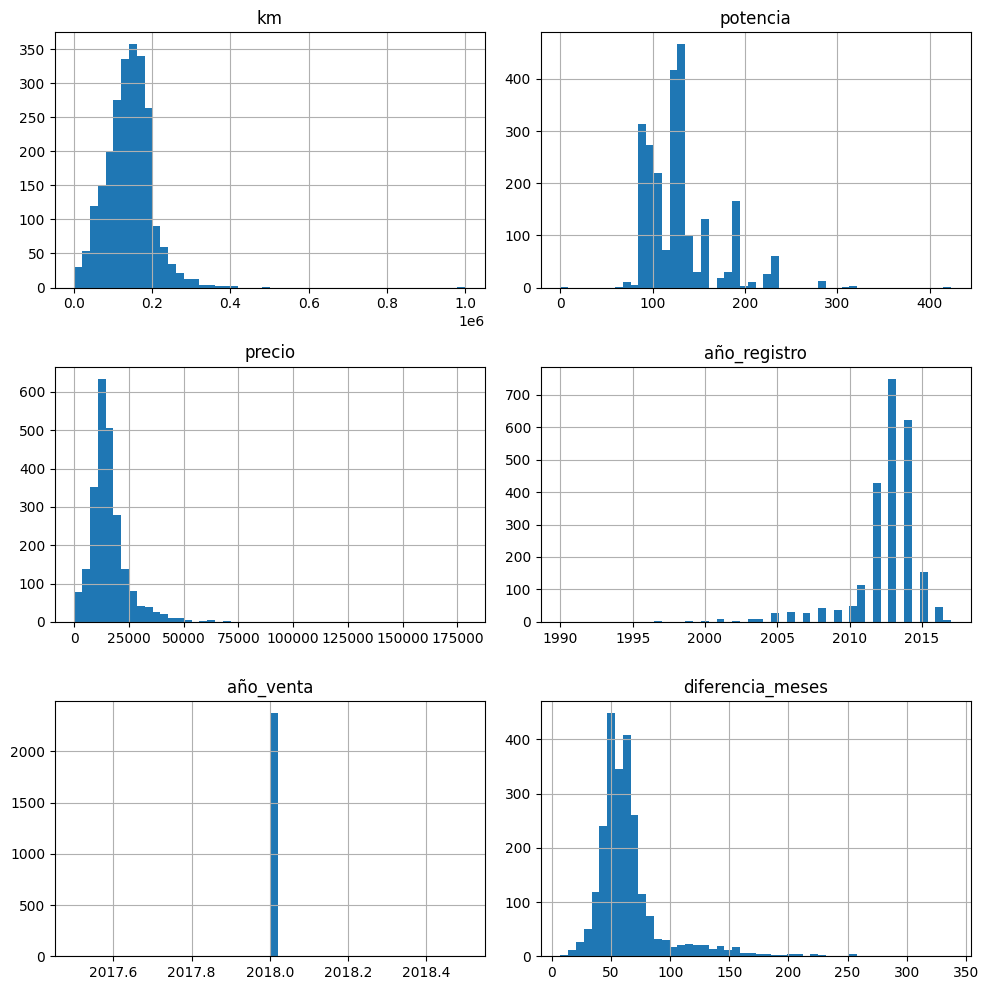

In [74]:
# 0: Vamos a visualizar cada columna con sus variables para ver si hay datos "extraños"
# 0.1: Crear histogramas para todas las columnas numéricas
df_bmw.select_dtypes(include=[int, float]).hist(bins=50, figsize=(10, 10))
plt.tight_layout()
plt.show()

In [75]:
# OBS: Dentro de la columna "km" no se aprecian datos extraños o outliers.
# OBS: Dentro de la columna "precio" no se aprecian datos extraños o outliers.
# OBS: Dentro de la columna "potencia" vemos que hay coches con potencias muy cercanas a 0 lo cual es extraño. Lo más común es que existan coches con potencias a partir de 50

# 1: Vamos a quedarnos con todos aquellos coches con potencia igual o superior a 50.
df_bmw = df_bmw[df_bmw['potencia'] >= 50]

<Axes: >

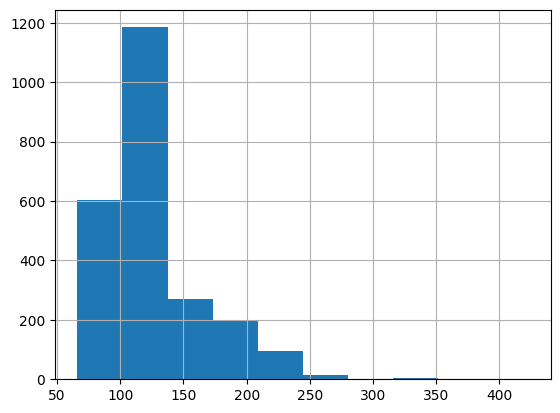

In [76]:
df_bmw["potencia"].hist()

# OBS: Vemos que la potencia de los coches empieza en 50 y no en 0 como antes.

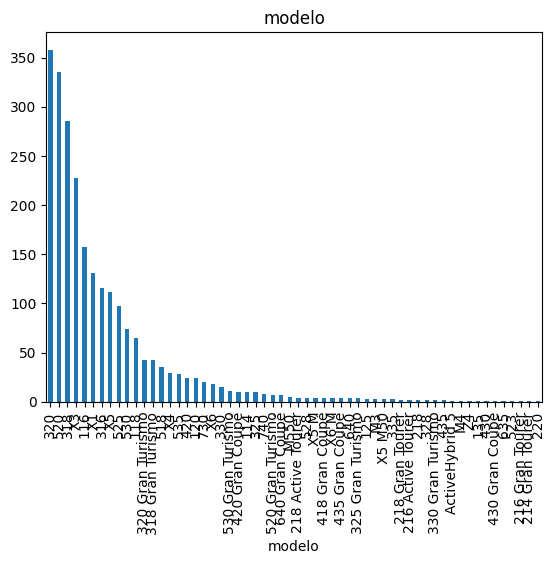

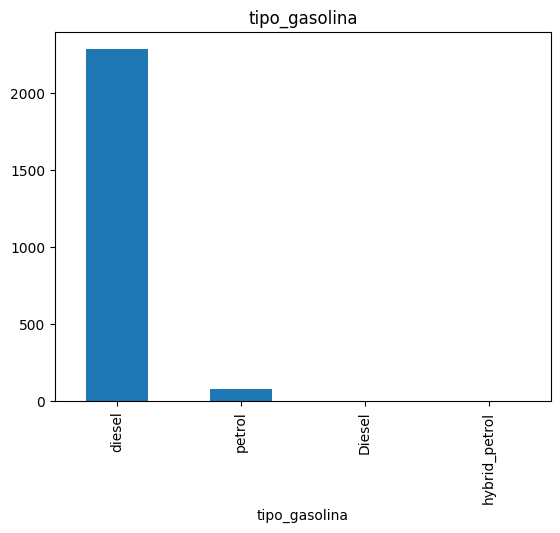

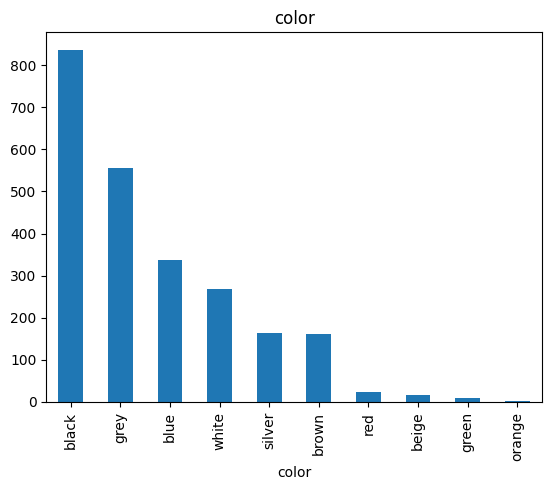

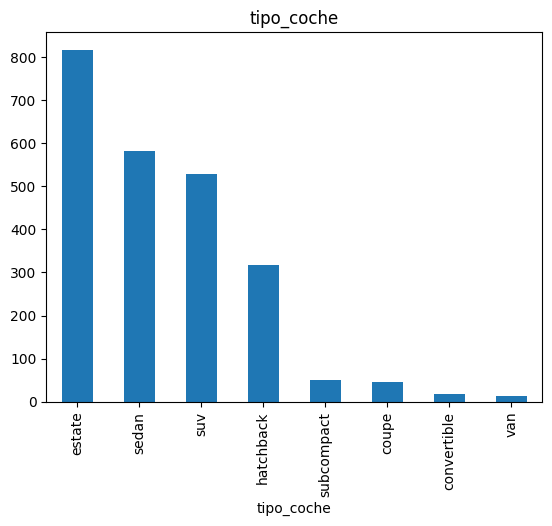

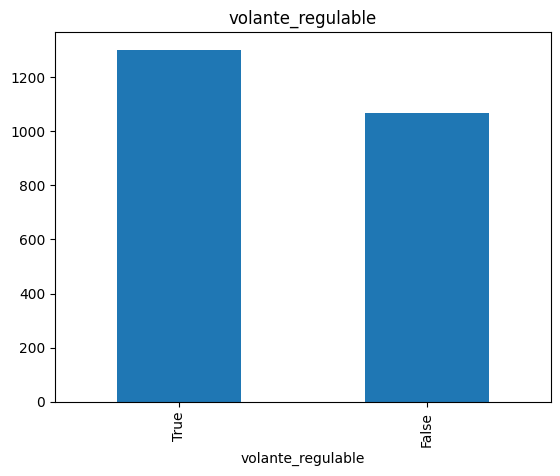

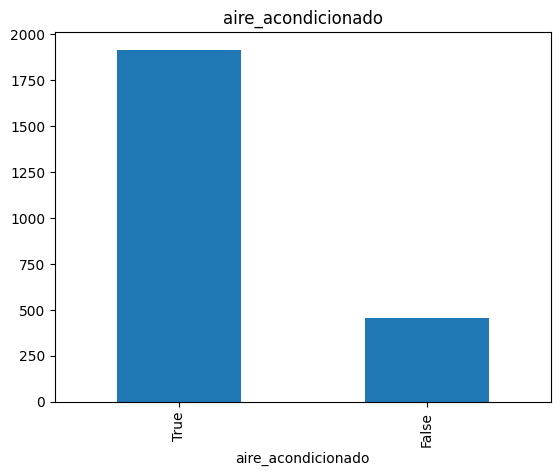

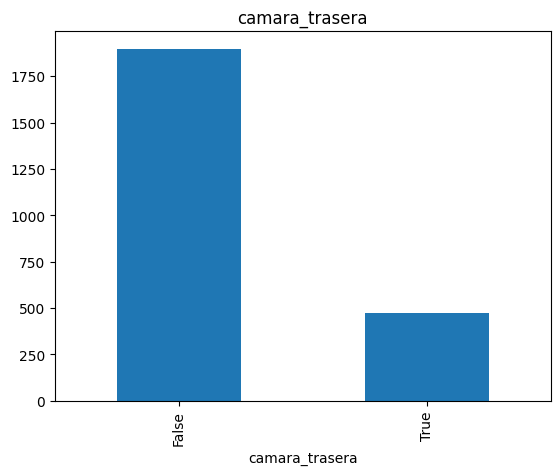

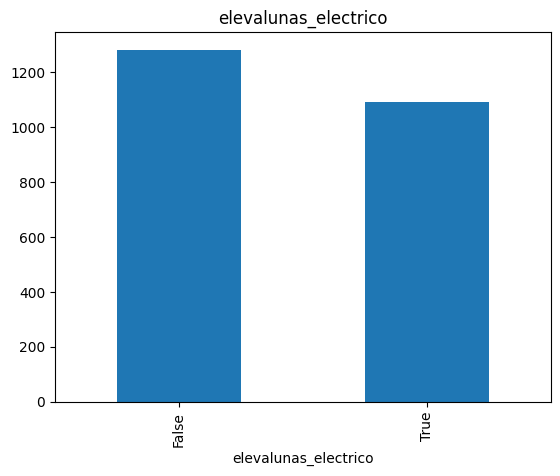

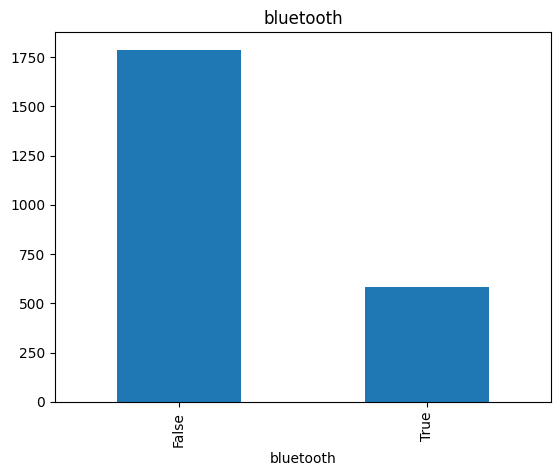

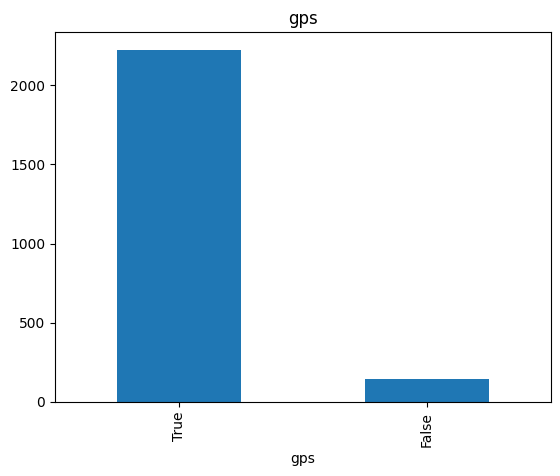

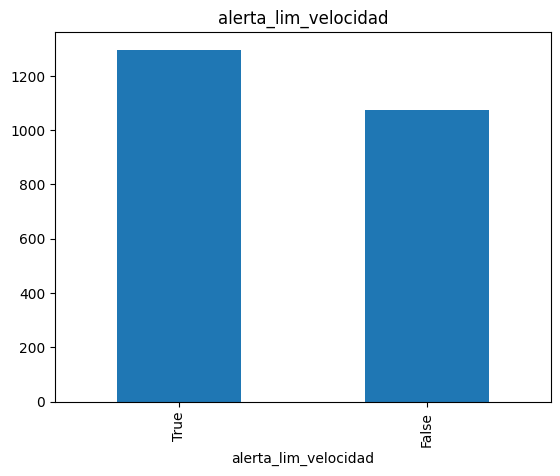

In [77]:
# HISTOGRAMAS PARA VARIABLES CATEGORICAS
# 0: Creamos gráficos de barras para todas las columnas categóricas
categorical_columns = df_bmw.select_dtypes(include=[object, 'bool'])
for column in categorical_columns:
    df_bmw[column].value_counts().plot(kind='bar', title=column)
    plt.show()

In [78]:
# OBS: Dentro de las columnas no se aprecian datos extraños o outliers.
# OBS: Pero dentro de la columna tipo_gasolina vemos que hay 5 categorías, pero se pueden agrupar la variable diesel con Diesel y la variable hybrid_petrol con petrol.
# OBS: Nos deben quedar 3 variables categóricas: petrol, diesel y electro.

# 1: Calculamos los pesos de la distribución de gasolina:
gasolina_distribution = df_bmw['tipo_gasolina'].value_counts(normalize=True)
gasolina_distribution

tipo_gasolina
diesel           0.963307
petrol           0.035006
Diesel           0.001265
hybrid_petrol    0.000422
Name: proportion, dtype: float64

In [79]:
# 2: Diccionario de mapeo para categorías de gasolina
gas_type_mapping = {
    'diesel': 'diesel',
    'Diesel': 'diesel',
    'petrol': 'petrol',
    'hybrid_petrol': 'petrol',
    'electro': 'electro'
}

# 3: Aplicamos el mapeo
df_bmw['tipo_gasolina'] = df_bmw['tipo_gasolina'].map(gas_type_mapping)

In [80]:
# 4: Revisamos el resultado:
gasolina_distribution = df_bmw['tipo_gasolina'].value_counts(normalize=True)
gasolina_distribution

tipo_gasolina
diesel    0.964572
petrol    0.035428
Name: proportion, dtype: float64

##4. Análisis de correlación inicial, ¿Hay alguna variable correlacionada?

In [81]:
df_bmw.info()
# OBS: Como podemos ver la mayoría de columnas que contienen True o False son type object pero deberian ser type bool.

<class 'pandas.core.frame.DataFrame'>
Index: 2371 entries, 0 to 2371
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                2371 non-null   object 
 1   km                    2371 non-null   float64
 2   potencia              2371 non-null   float64
 3   tipo_gasolina         2371 non-null   object 
 4   color                 2371 non-null   object 
 5   tipo_coche            2371 non-null   object 
 6   volante_regulable     2371 non-null   object 
 7   aire_acondicionado    2371 non-null   object 
 8   camara_trasera        2371 non-null   object 
 9   elevalunas_electrico  2371 non-null   object 
 10  bluetooth             2371 non-null   object 
 11  gps                   2371 non-null   bool   
 12  alerta_lim_velocidad  2371 non-null   object 
 13  precio                2371 non-null   float64
 14  año_registro          2371 non-null   int32  
 15  año_venta             2371

In [82]:
corr = df_bmw.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')
# OBS: Cuando intentamos hacer la correlacion entre las columnas vemos que solo nos salen 5 columnas que son numéricas.

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,km,potencia,gps,precio,año_registro,año_venta,diferencia_meses
km,1.000000,-0.050649,0.173496,-0.397440,-0.480065,nan,0.480164
potencia,-0.050649,1.000000,-0.004792,0.614164,0.102641,nan,-0.107778
gps,0.173496,-0.004792,1.000000,-0.018325,-0.075744,nan,0.080827
precio,-0.397440,0.614164,-0.018325,1.000000,0.428436,nan,-0.424356
año_registro,-0.480065,0.102641,-0.075744,0.428436,1.000000,nan,-0.991115
año_venta,nan,nan,nan,nan,nan,nan,nan
diferencia_meses,0.480164,-0.107778,0.080827,-0.424356,-0.991115,nan,1.000000


In [83]:
# 0: Lista de las columnas a convertir
columns_to_convert = [
    'volante_regulable',
    'aire_acondicionado',
    'camara_trasera',
    'elevalunas_electrico',
    'alerta_lim_velocidad',
    'bluetooth'
]

# 1: Convertir valores de string 'True'/'False' a booleanos True/False
for column in columns_to_convert:
    df_bmw[column] = df_bmw[column].replace({'True': True, 'False': False}).astype(bool)

In [84]:
# 2: Vamos a revisar si se han cambiado las columnas de type object a bool.
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2371 entries, 0 to 2371
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                2371 non-null   object 
 1   km                    2371 non-null   float64
 2   potencia              2371 non-null   float64
 3   tipo_gasolina         2371 non-null   object 
 4   color                 2371 non-null   object 
 5   tipo_coche            2371 non-null   object 
 6   volante_regulable     2371 non-null   bool   
 7   aire_acondicionado    2371 non-null   bool   
 8   camara_trasera        2371 non-null   bool   
 9   elevalunas_electrico  2371 non-null   bool   
 10  bluetooth             2371 non-null   bool   
 11  gps                   2371 non-null   bool   
 12  alerta_lim_velocidad  2371 non-null   bool   
 13  precio                2371 non-null   float64
 14  año_registro          2371 non-null   int32  
 15  año_venta             2371

In [85]:
# Vamos a convertir las Variables Booleanas en Numéricas:
# 0: Transformamos las columnas que tienen valores "True" y "False" a 1 y 0, respectivamente.

columnas_booleanas = ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'alerta_lim_velocidad', 'bluetooth', 'gps']

# 1: Convertimos cada columna booleana en numérica (True a 1, False a 0)
for column in columnas_booleanas:
    df_bmw[column] = df_bmw[column].astype(int)


In [86]:
# 2: Vamos a revisar si se han hecho los cambios
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2371 entries, 0 to 2371
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                2371 non-null   object 
 1   km                    2371 non-null   float64
 2   potencia              2371 non-null   float64
 3   tipo_gasolina         2371 non-null   object 
 4   color                 2371 non-null   object 
 5   tipo_coche            2371 non-null   object 
 6   volante_regulable     2371 non-null   int64  
 7   aire_acondicionado    2371 non-null   int64  
 8   camara_trasera        2371 non-null   int64  
 9   elevalunas_electrico  2371 non-null   int64  
 10  bluetooth             2371 non-null   int64  
 11  gps                   2371 non-null   int64  
 12  alerta_lim_velocidad  2371 non-null   int64  
 13  precio                2371 non-null   float64
 14  año_registro          2371 non-null   int32  
 15  año_venta             2371

In [87]:
# 3: Ahora vamos a resetar los indices para que queden actualizados
df_bmw.reset_index(drop=True,inplace=True)

In [88]:
# 4: Ahora que todas las columnas que  debían ser bool y que eran object son bool, vamos a hacer la coorrelacion
corr = df_bmw.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

# OBS: Vemos que no hay columnas que estén lo suficientemente correlacionadas como para eliminarlas. Eliminaríamos a partir se 0.89...

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta,diferencia_meses
km,1.000000,-0.050649,0.061091,0.004530,0.019163,0.040172,-0.052778,0.173496,-0.043899,-0.397440,-0.480065,nan,0.480164
potencia,-0.050649,1.000000,0.315221,0.196881,0.314632,0.313730,0.210368,-0.004792,0.494528,0.614164,0.102641,nan,-0.107778
volante_regulable,0.061091,0.315221,1.000000,0.280458,0.257953,0.252469,0.108801,0.216949,0.233812,0.251237,-0.049594,nan,0.057800
aire_acondicionado,0.004530,0.196881,0.280458,1.000000,0.139570,0.263320,0.080266,0.309420,0.219801,0.224859,0.229913,nan,-0.233015
camara_trasera,0.019163,0.314632,0.257953,0.139570,1.000000,0.194869,0.132780,0.071664,0.184106,0.238132,-0.023817,nan,0.023633
elevalunas_electrico,0.040172,0.313730,0.252469,0.263320,0.194869,1.000000,0.236725,0.191533,0.318233,0.230783,0.096360,nan,-0.100779
bluetooth,-0.052778,0.210368,0.108801,0.080266,0.132780,0.236725,1.000000,0.106381,0.103788,0.210478,0.081539,nan,-0.085494
gps,0.173496,-0.004792,0.216949,0.309420,0.071664,0.191533,0.106381,1.000000,-0.051465,-0.018325,-0.075744,nan,0.080827
alerta_lim_velocidad,-0.043899,0.494528,0.233812,0.219801,0.184106,0.318233,0.103788,-0.051465,1.000000,0.417091,0.150240,nan,-0.150880
precio,-0.397440,0.614164,0.251237,0.224859,0.238132,0.230783,0.210478,-0.018325,0.417091,1.000000,0.428436,nan,-0.424356


##5. Análisis variable vs target, ¿Hay algún insight interesante?

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

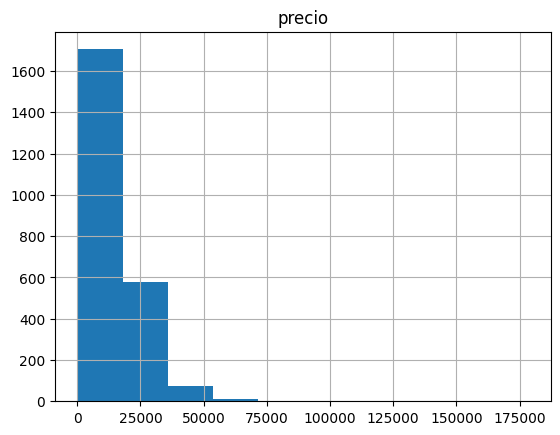

In [89]:
# 0: Analizamos la variable target:
df_bmw.hist("precio")

<Axes: xlabel='precio'>

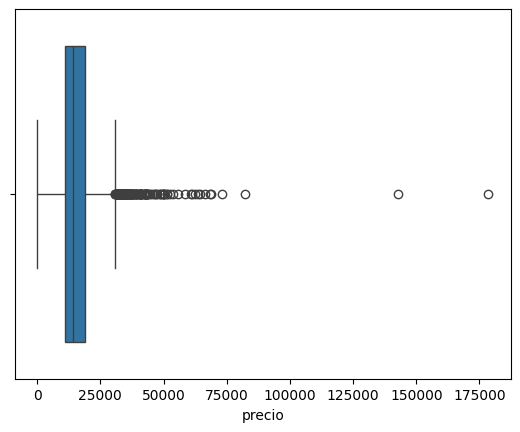

In [90]:
# 0: Analizamos la variable target:
sns.boxplot(x=df_bmw["precio"])

# OBS: Vemos que hay muchas diferencias de precios y que hay unos cuantos outliers pero que son correctos ya que hay coches que cuestan mucho mas que otros.

<ipython-input-91-2aa15cd4ac0f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="modelo",y="precio", data=df_bmw, palette="Wistia")


<Axes: xlabel='modelo', ylabel='precio'>

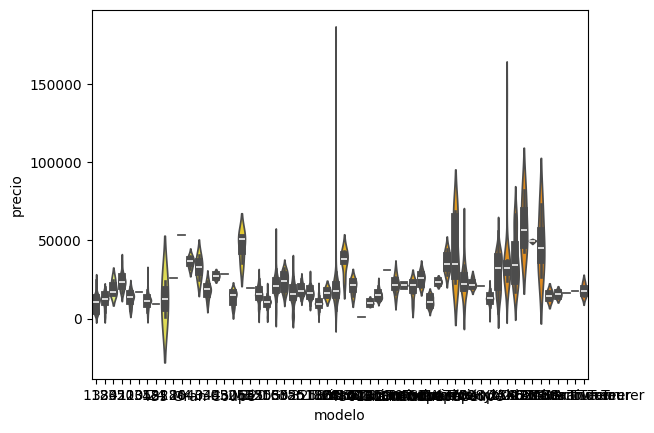

In [91]:
# 0: Analizamos las variables modelo/target:
sns.violinplot(x="modelo",y="precio", data=df_bmw, palette="Wistia")

# OBS: Comparar modelos con precio es una buena idea pero a nivel gráfico no se ve nada

array([[<Axes: title={'center': 'potencia'}>]], dtype=object)

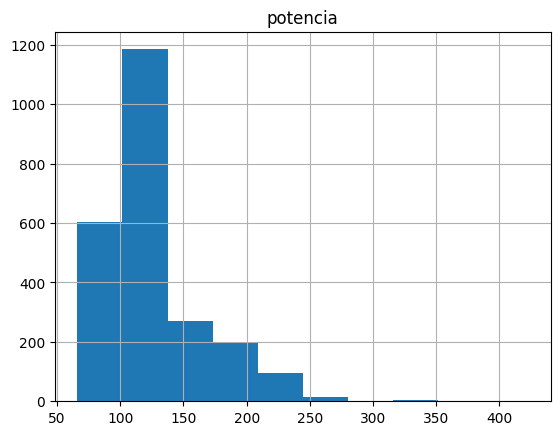

In [92]:
# 0: Analizamos variable potencia:
df_bmw.hist("potencia")

<ipython-input-93-ad2071fab2eb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="tipo_coche",y="precio", data=df_bmw, palette="Wistia")


<Axes: xlabel='tipo_coche', ylabel='precio'>

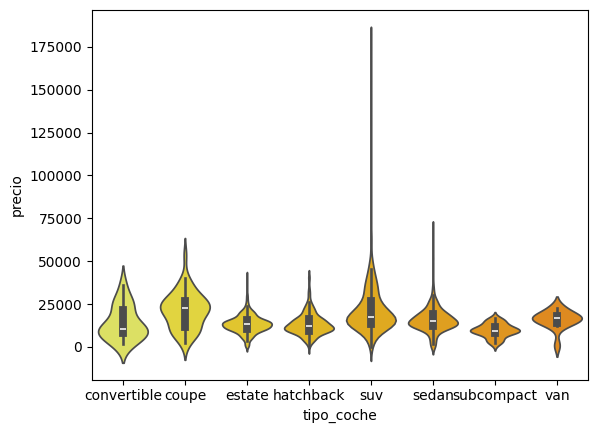

In [93]:
# 0: Analizamos las variables tipo_coche/target:
sns.violinplot(x="tipo_coche",y="precio", data=df_bmw, palette="Wistia")

# OBS: Vemos que los tipos de coches más caros son el 'suv' y el 'coupe'.

<ipython-input-94-8456803376c1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="aire_acondicionado",y="precio", data=df_bmw, palette="Wistia")


<Axes: xlabel='aire_acondicionado', ylabel='precio'>

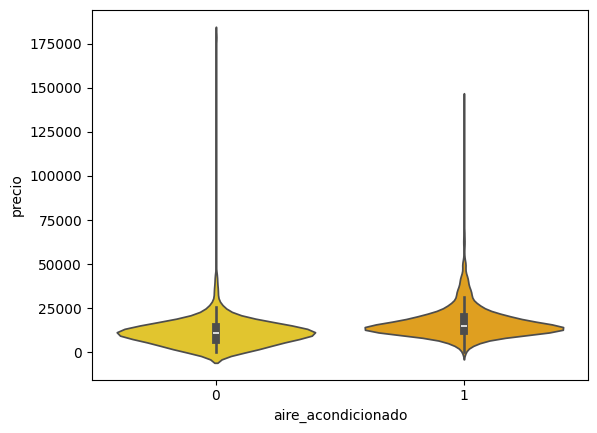

In [94]:
# 0: Analizamos las variables aire_acondicionado/target:
sns.violinplot(x="aire_acondicionado",y="precio", data=df_bmw, palette="Wistia")

<Axes: xlabel='km', ylabel='precio'>

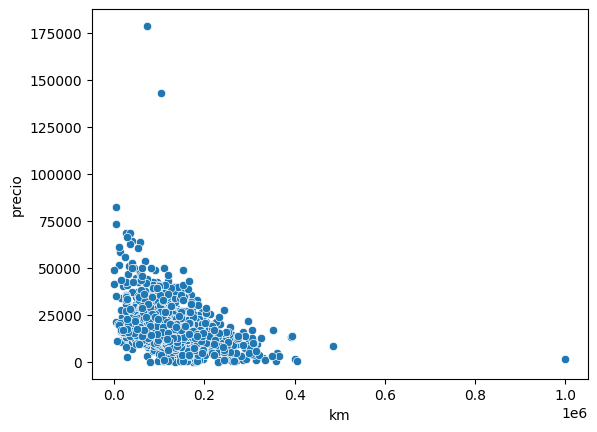

In [95]:
# 0: Analizamos las variables km/target:
sns.scatterplot(x="km", y="precio",data=df_bmw)

# OBS: Vemos que los puntos forman una especie de triangulo rectángulo. A menos km tiene el coche, mayor es su precio.

##6. Transformación de categóricas a numéricas, ¿Qué variables van a transformar? ¿Que técnica se va usar

In [113]:
# 0: Identificar columnas categóricas y numéricas
columnas_categoricas = df_bmw.select_dtypes(include=['object']).columns.tolist()
columnas_numericas = df_bmw.select_dtypes(include=['int', 'float']).columns.tolist()

In [97]:
# 2: Convertir las variables categóricas en variables dummy
df_bmw = pd.get_dummies(data=df_bmw, columns=columnas_categoricas, dtype=int)

# 3: Verificar el resultado
df_bmw.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,140411.0,100.0,1,1,0,1,1,1,0,11300.0,...,0,0,1,0,0,0,0,0,0,0
1,183297.0,120.0,0,0,0,1,0,1,0,10200.0,...,0,1,1,0,0,0,0,0,0,0
2,152352.0,225.0,1,1,0,1,1,1,1,17100.0,...,0,0,0,1,0,0,0,0,0,0
3,115560.0,105.0,1,1,0,0,1,1,0,6100.0,...,0,1,1,0,0,0,0,0,0,0
4,132025.0,135.0,1,0,0,1,1,1,1,21700.0,...,0,0,1,0,0,0,0,0,0,0


In [98]:
# 4: Volvemos a hacer las correlaciones para ver si se puede borrar alguna columna
corr = df_bmw.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

# OBS: Aunque tipo_gasolina_petrol y tipo_gasolina_diesel esten inversamente correlacioandas no las vamos a borrar.

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [99]:
# OBS: Vemos que los porcentajes han cambiado ligeramente.
porcentaje_año_venta = df_bmw['año_venta'].value_counts(normalize=True) * 100
porcentaje_año_venta

año_venta
2018    100.0
Name: proportion, dtype: float64

In [100]:
# Todos se vendieron en 2018 por lo tanto habría sugiero eliminar esa columna.

In [101]:
# Eliminar la columna 'año_venta' si todos los coches se vendieron en el mismo año
df_bmw.drop(columns=['año_venta'], inplace=True)

##7. Escalar variables (usando minmaxscaler) y luego aplicar la correlación final de variables ¿Hay alguna variable finalmente correlacionada?

In [122]:
# Escalar las columnas numéricas usando MinMaxScaler
scaler = MinMaxScaler()
df_bmw = pd.DataFrame(scaler.fit_transform(df_bmw), columns=df_bmw.columns)

In [123]:
df_bmw.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,0.139832,0.095238,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.062780,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.182728,0.151261,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.056614,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.151776,0.445378,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.095291,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.114975,0.109244,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.033632,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.131444,0.193277,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.121076,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
# Calcular la matriz de correlación
corr = df_bmw.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

In [128]:
umbral_correlacion = 0.6

# Encontrar las variables con una correlación mayor al umbral
variables_correlacionadas = []
for col in matrix_cor.columns:
    correlaciones = matrix_cor[col][matrix_cor[col] > umbral_correlacion].drop(labels=[col])
    if not correlaciones.empty:
        for idx in correlaciones.index:
            variables_correlacionadas.append((col, idx, correlaciones[idx]))

# Mostrar las variables correlacionadas
print("Variables correlacionadas:")
for var in variables_correlacionadas:
    print(f"{var[0]} está correlacionada con {var[1]} con una correlación de {var[2]:.2f}")

Variables correlacionadas:
potencia está correlacionada con precio con una correlación de 0.61
precio está correlacionada con potencia con una correlación de 0.61
modelo_420 está correlacionada con tipo_coche_coupe con una correlación de 0.60
modelo_X3 está correlacionada con tipo_coche_suv con una correlación de 0.60
tipo_coche_coupe está correlacionada con modelo_420 con una correlación de 0.60
tipo_coche_suv está correlacionada con modelo_X3 con una correlación de 0.60


In [ ]:
#No hay columnas que estén lo suficientemente correlacionadas como para eliminarlas.

##8. Subir un pantallazo con el nombre de TODAS las columnas que tiene el dataframe final final vfin y el tipo de dato que tiene, tip lo más sencillo es hacer un .info al dataframe y tomarle un pantallazo y subirlo, importante deben aparecer TODAS las columnas

In [121]:
df_bmw.info()

# Hacer captura una vez este todo revisado por los 4 integrantes del grupo y conformes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 90 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   km                        2371 non-null   float64
 1   potencia                  2371 non-null   float64
 2   volante_regulable         2371 non-null   int64  
 3   aire_acondicionado        2371 non-null   int64  
 4   camara_trasera            2371 non-null   int64  
 5   elevalunas_electrico      2371 non-null   int64  
 6   bluetooth                 2371 non-null   int64  
 7   gps                       2371 non-null   int64  
 8   alerta_lim_velocidad      2371 non-null   int64  
 9   precio                    2371 non-null   float64
 10  año_registro              2371 non-null   int32  
 11  diferencia_meses          2371 non-null   float64
 12  modelo_114                2371 non-null   int64  
 13  modelo_116                2371 non-null   int64  
 14  modelo_1

##9. Exportar en un excel de las primeras 50 filas del dataset (df.to_excel(...)

In [130]:
# Exportar las primeras 50 filas del DataFrame a un archivo Excel
file_name = 'primeras_50_filas.xlsx'
df_bmw.head(50).to_excel(file_name, index=False)

# Descargar el archivo
from google.colab import files
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##10. Sube el programa (el archivo .ipynb, NO EL PICKLE de lo contrario me quedaré sin espacio...) y con esto hemos terminado ;)

In [129]:
df_bmw.isnull().sum()


km                       0
potencia                 0
volante_regulable        0
aire_acondicionado       0
camara_trasera           0
                        ..
tipo_coche_hatchback     0
tipo_coche_sedan         0
tipo_coche_subcompact    0
tipo_coche_suv           0
tipo_coche_van           0
Length: 90, dtype: int64